In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from tabulate import tabulate
from sklearn import linear_model, tree, ensemble
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, r2_score
import itertools
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Change the directory to Machine-Learning folder
%cd /content/drive/My Drive/Colab Notebooks/Machine-Learning/

/content/drive/My Drive/Colab Notebooks/Machine-Learning


In [5]:
#"\" is used to divide long code into multiple lines
%cd /content/drive/My Drive/Colab Notebooks/Machine-Learning/

/content/drive/My Drive/Colab Notebooks/Machine-Learning


In [6]:
#importing our  dataset
dataset = pd.read_csv('./ionosphere_csv.csv')

In [7]:
dataset.columns #columns of dataset

Index(['results', 'a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08',
       'a09', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18',
       'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28',
       'a29', 'a30', 'a31', 'a32', 'a33', 'a34'],
      dtype='object')

In [8]:
# we change the class values (at the column number 2) from b to 0 and from g to 1
dataset.iloc[:,0].replace('b', 0,inplace=True)
dataset.iloc[:,0].replace('g', 1,inplace=True)

In [9]:
#datatype of dataset
dataset.dtypes

results      int64
a01          int64
a02          int64
a03        float64
a04        float64
a05        float64
a06        float64
a07        float64
a08        float64
a09        float64
a10        float64
a11        float64
a12        float64
a13        float64
a14        float64
a15        float64
a16        float64
a17        float64
a18        float64
a19        float64
a20        float64
a21        float64
a22        float64
a23        float64
a24        float64
a25        float64
a26        float64
a27        float64
a28        float64
a29        float64
a30        float64
a31        float64
a32        float64
a33        float64
a34        float64
dtype: object

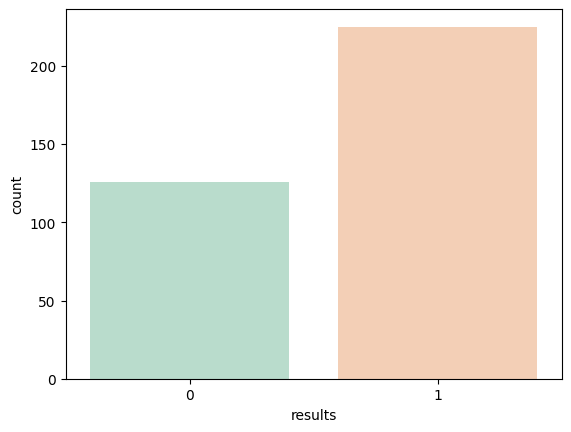

In [32]:

sns.countplot(x='results',data=dataset,palette = "Pastel2")

plt.show()

In [11]:
dataset.shape   #shape of dataset

(351, 35)

In [33]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import scikitplot as skplt
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [14]:
X= dataset.drop('results',axis=1)
y= dataset['results']

In [15]:
X[:5]

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [16]:
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: results, dtype: int64

In [17]:
# split data train 70 % and test 30 %
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=25)

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

models={'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
        'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis()
}

In [19]:
model_test_score={}
model_train_score={}

for name,model in models.items():
    model.fit(X_train,y_train)
    model_test_score[name]=model.score(X_test,y_test)
    model_train_score[name]=model.score(X_train,y_train)

In [20]:
df= pd.DataFrame(model_test_score,index=['Test_accuracy'])
df=df.transpose()

In [21]:
df['Train_accuracy']=model_train_score.values()
df['Difference']= (df['Train_accuracy']-df['Test_accuracy'])
df

,Test_accuracy,Train_accuracy,Difference
Linear Discriminant Analysis,0.849057,0.934694,0.085637
QuadraticDiscriminantAnalysis,0.924528,0.946939,0.022410


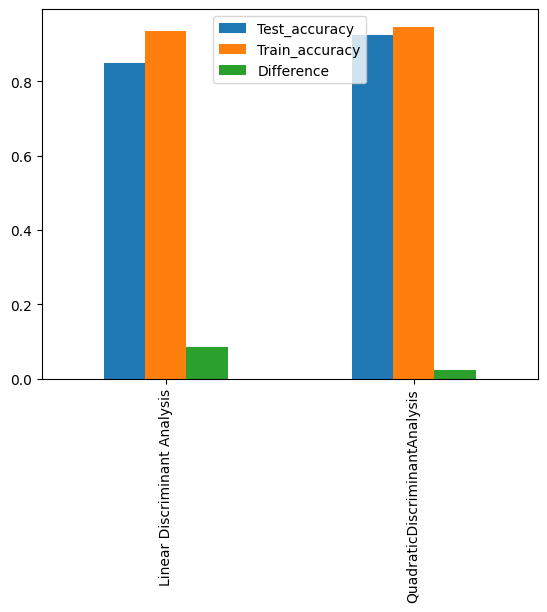

In [34]:
df.plot.bar();

In [23]:
nonlr_clf_dict = dict()


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
nonlr_clf_dict['Linear Discriminant Classifier'] = clf

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
nonlr_clf_dict['Quadratic Discriminant Classifier'] = clf

In [24]:
#This method plots the confusion matrix
def Plot_Confusion_Matrix(best_model):
    cmap = plt.cm.Blues
    cm = confusion_matrix(y_test, predicted)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    title='Confusion matrix (on test data)'
    classes = [0, 1]
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    c_report = classification_report(y_test, predicted)
    print('\nClassification report:\n', c_report)

    ntotal = len(y_test)
    correct = y_test == predicted
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect,
                                                                                 ntotal,
                                                                                 percent))
    prediction_score = 100.0*best_model.score(X_test, y_test)
    assert (round(percent,3) == round(prediction_score, 3)), "prediction score does not agree"

In [35]:
def cms(cm):
  plt.figure(figsize=(7,4))
  sns.heatmap(cm,annot=True,cmap='Pastel2',linewidths=.5)
  plt.title(f"Confusion matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()

---------------------------------------------------------------------
Linear Discriminant Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.852112676056338 0.08429426119755212

---------------------------------------------------------------------
Linear Discriminant Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.852112676056338 0.08429426119755212

---------------------------------------------------------------------
Linear Discriminant Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.852112676056338 0.08429426119755212

---------------------------------------------------------------------
Linear Discriminant Classifi

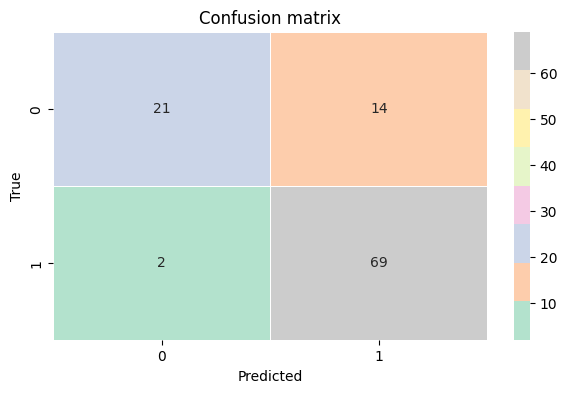

Accuracy: 0.85
Precision: 0.83
Recall: 0.97
F1: 0.90
Average accuracy:  [0.76056338 0.75714286 0.85714286 0.91428571 0.97142857]
Standard Deviation:  0.08429426119755212


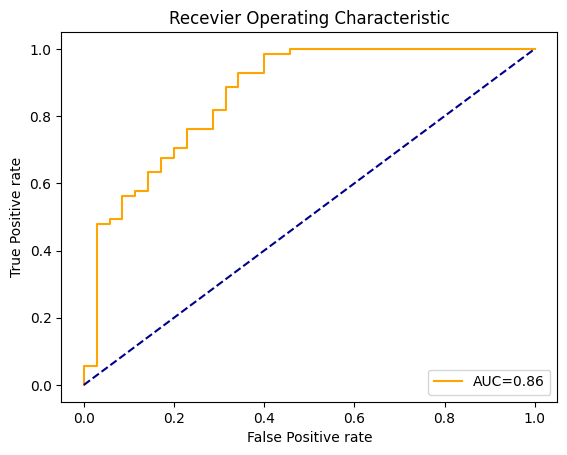

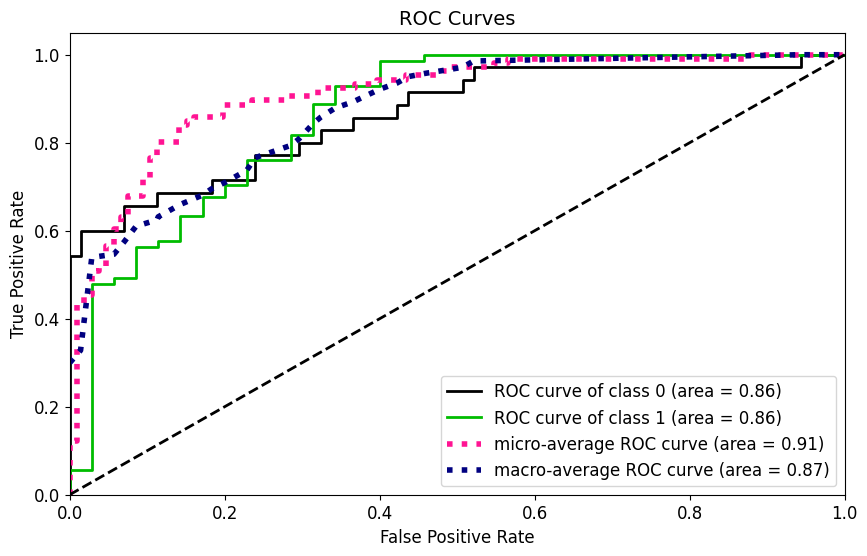

---------------------------------------------------------------------
Quadratic Discriminant Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.886036217303823 0.023913241754767174

---------------------------------------------------------------------
Quadratic Discriminant Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.886036217303823 0.023913241754767174

---------------------------------------------------------------------
Quadratic Discriminant Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.886036217303823 0.023913241754767174

---------------------------------------------------------------------
Quadratic Discri

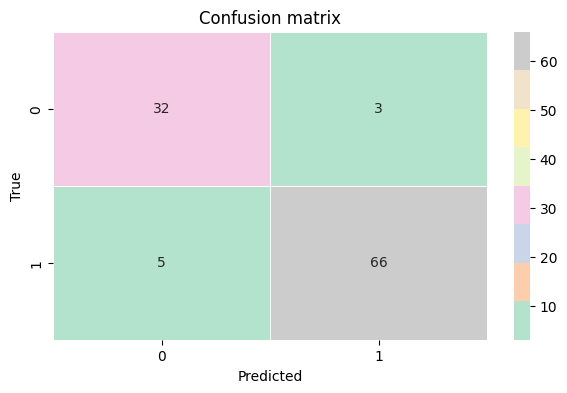

Accuracy: 0.92
Precision: 0.96
Recall: 0.93
F1: 0.94
Average accuracy:  [0.88732394 0.87142857 0.85714286 0.88571429 0.92857143]
Standard Deviation:  0.023913241754767174


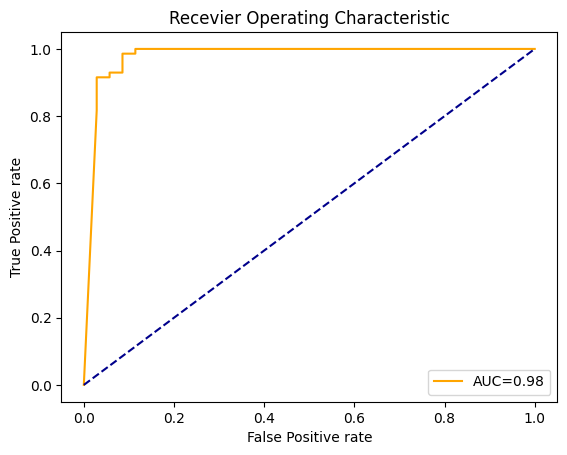

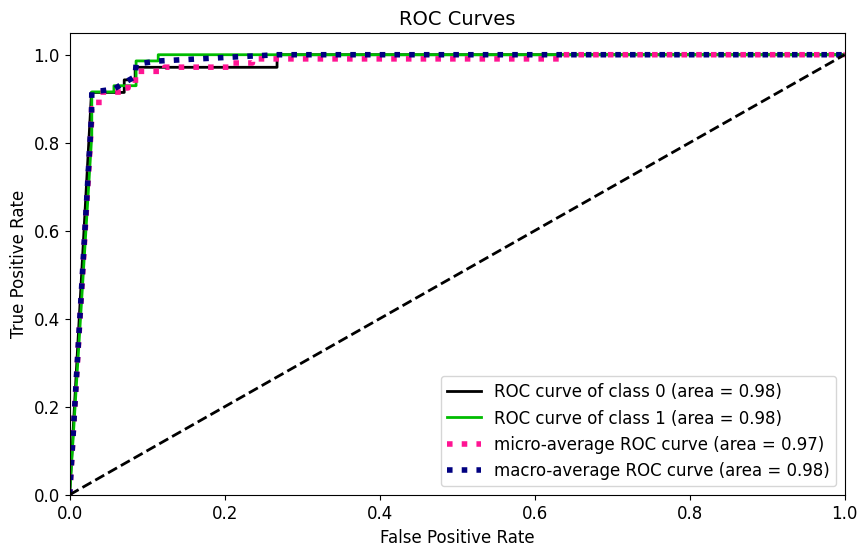

In [36]:
#importing the K fold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import numpy as np
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=None)
scoring_strings = ['accuracy', 'precision', 'recall', 'f1',
                       'average_precision', 'roc_auc']

for clf_name, clf in nonlr_clf_dict.items():
    for scoring in scoring_strings:
        scores = cross_val_score(clf,X, y, cv=kfold)
        print("---------------------------------------------------------------------")
        print(clf_name)
        print("---------------------------------------------------------------------")
        print("Cross Validation scores on training data")
        print('Scoring Name: CV mean: %.5f CV std: %.5f',scoring,np.mean(np.abs(scores)),np.std(scores))
        print("")



    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    y_prob= clf.predict_proba(X_test)

    predicted=clf.predict(X_test)
    confusion = confusion_matrix(y_test,predicted)
    cms(confusion)
    #print('Most frequent class \n', confusion)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predicted)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predicted)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predicted)))
    print('F1: {:.2f}'.format(f1_score(y_test, predicted)))
    accuracy_qda=np.mean(abs(scores))
    print('Average accuracy: ',scores)
    print('Standard Deviation: ',scores.std())


    positive_prob=y_prob[:,1]
    fpr,tpr,threshold= roc_curve(y_test,positive_prob)
    roc_auc= auc(fpr,tpr)
    plt.title('Recevier Operating Characteristic')
    plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.ylabel('True Positive rate')
    plt.xlabel('False Positive rate');

    y_prob= clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()

